In [71]:
import numpy as np
from src.io.psee_loader import PSEELoader

# Opening a file

In [72]:
# open a file
video = PSEELoader("/Volumes/SN550_2/Large_Automotive_Detection_Dataset/train/moorea_2019-06-26_test_02_000_976500000_1036500000_td.dat")
print(video)  # show some metadata
video.event_count()  # number of events in the file
video.total_time()  # duration of the file in mus

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/SN550_2/Large_Automotive_Detection_Dataset/train/moorea_2019-06-26_test_02_000_976500000_1036500000_td.dat'

# Event Format

In [ ]:
# let's read some Events , there are two ways by number of events or by time slices
events = video.load_n_events(10)  # this loads the 10 next events
events

NameError: name 'video' is not defined

Events are in a numpy [structured array](https://docs.scipy.org/doc/numpy/user/basics.rec.html)

In [ ]:
# TLDR : we can access different fields in this one dimensional array
print(events['t'])  # this shows only the timestamps of events
# for instance to count the events of positive polarity you can do :
np.sum(events['p'] > 0)

[0 0 0 0 0 0 0 0 0 0]


6

In [ ]:
# let's randomly drop some events
np.random.choice(events, len(events)//2)

array([(0,  833, 275, 1), (0,  955, 274, 1), (0, 1245, 275, 0),
       (0,  959, 274, 0), (0, 1202, 287, 1)],
      dtype=[('t', '<u4'), ('x', '<u2'), ('y', '<u2'), ('p', 'u1')])

In [ ]:
# let's now try to read 10ms worth of events
events = video.load_delta_t(10000)
events

array([(   0, 1005, 318, 1), (   1, 1256, 319, 0), (   1,  187, 319, 1),
       ..., (9999,  366, 577, 0), (9999,    1, 578, 1),
       (9999,   31, 579, 1)],
      dtype=[('t', '<u4'), ('x', '<u2'), ('y', '<u2'), ('p', 'u1')])

# Iteration

In [ ]:
# to iterate through a dataset you can use :
while not video.done:
    # load events and boxes from all files
    events = video.load_delta_t(50000)
    # do something with the events

In [ ]:
# once a video is fully read there is no events in it anymore :
print(len(video.load_n_events(1)))

In [ ]:
# but you can rewind using seek_event or seek_time
video.seek_event(3)  # this goes before the fourth events (index starts at 0)

In [ ]:
video.seek_time(10000)  # this goes before the first event after 9999mus

# Bonus

In [ ]:
# this functions can be used to read a video backwards for instance
video.seek_time(video.total_time()+1)
delta_t = 100000
for t in np.arange(video.total_time()- delta_t, -delta_t, -delta_t):
    video.seek_time(t)
    events = video.load_delta_t(delta_t)
    # they should be sorted in descending timestamp order !
    events = events[::-1]
    # do some cunning computer vision here.
    pass

In [ ]:
video = PSEELoader("/Volumes/SN550_2/Large_Automotive_Detection_Dataset/LAD/train/moorea_2019-06-26_test_02_000_976500000_1036500000_td.dat")
arr = PSEELoader("/Volumes/SN550_2/Large_Automotive_Detection_Dataset/LAD/train/moorea_2019-06-26_test_02_000_976500000_1036500000_bbox.npy")

In [ ]:
pc = video.load_delta_t(16667)
bbox = arr.load_delta_t(16667)
#print(pc.shape)


[ 58.61103   27.658522  43.140923  51.789036  41.43892   45.227932
  43.947853  52.65162   62.023884  22.180376  27.82801   39.760498
  44.788216  20.61507   24.4927    19.608158  19.038961  57.423096
  28.189978  14.496424  21.450607  18.000528  29.775732 115.4875
  48.338623  20.125715  34.882782  24.576786  68.711174  26.493584
  29.267145  17.428686  56.45699   25.31706   29.490189  12.311843
  11.756523] [182.7097   101.154144 153.10672  197.78587  134.19653  165.95984
 159.14026  147.26746  186.49765   72.57347   99.605515 151.5391
 158.763     61.545464  75.77825   55.73567   60.331573 142.42354
  88.96791   37.12856   75.16499   58.915524  55.53595  187.39568
 129.69768   42.807133  58.65859   17.585133  61.13604   29.020746
  48.859707  19.221563 116.5453    57.74369   67.519     29.007439
  28.370743]


In [ ]:
print(bbox["x"],bbox["y"])

[1346.1038    853.18256  1222.2069    997.2147    916.6274   1262.8862
 1305.107    1116.6061   1033.9626    762.1226    822.39404   958.85547
 1180.5414    681.5961    780.1239    619.1713    651.2567   1386.6812
  889.03094   -47.24474   742.1589    670.74664  -114.73352  1513.7289
 1082.0935    -81.467224  -12.407989  533.86865   457.38623   562.53906
 1232.3695    566.8217    946.20044   973.43677  1231.4938    181.6938
   -3.012293] [327.26074 355.39825 333.32968 312.2147  351.24408 324.7082  331.05298
 332.32068 318.70834 359.64456 357.41745 341.73727 328.97342 354.43533
 358.7494  360.0343  359.04263 340.53955 361.38034 381.43832 354.04108
 356.62344 383.44717 325.08197 343.18317 389.18173 381.47324 372.7152
 358.94366 267.59634 220.59856 309.39313  50.62867 316.00806 154.86134
 305.0125  322.62778]


In [ ]:
arr = "/Volumes/SN550_2/Large_Automotive_Detection_Dataset/LAD/train/moorea_2019-06-26_test_02_000_976500000_1036500000_bbox.npy"
import numpy as np
arr = np.load(arr)

In [ ]:
arr["t"]

array([    7806,     7806,     7806, ..., 59996948, 59996948, 59996948],
      dtype=uint64)

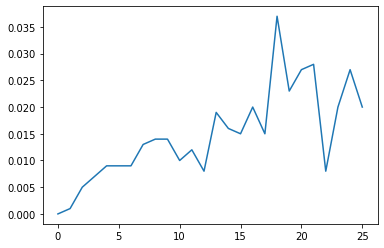

In [4]:
import matplotlib.pyplot as plt

acc=[0,0.001,0.005,0.007,0.009,0.009,0.009,0.013,0.014,0.014,0.010,0.012,0.008,0.019,0.016,0.015,0.020,0.015,0.037,0.023,0.027,0.028,0.008,0.020,0.027,0.020]
plt.plot(range(0,len(acc)),acc)

22


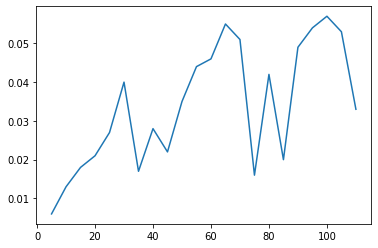

In [ ]:
#20210924-172527
acc=[0.006,0.013,0.018,0.021,0.027,0.040,0.017,0.028,0.022,0.035,0.044,0.046,0.055,0.051,0.016,0.042,0.020,0.049,0.054,0.057,0.053,0.033]
print(len(acc))
plt.plot(range(5,len(acc)*5+5,5),acc)

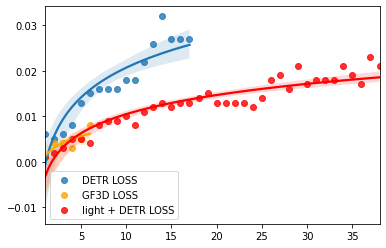

In [ ]:
acc_detr=[0.006,0.005,0.006,0.008,0.013,0.015,0.016,0.016,0.016,0.018,0.018,0.022,0.026,0.032,0.027,0.027,0.027]
acc_gf3d=[0.001,0.004,0.004,0.003,0.005,0.008]
acc_ldetr=[0.001,0.002,0.003,0.005,0.005,0.004,0.008,0.009,0.009,0.010,0.008,0.011,0.012,0.013,0.012,0.013,0.013,0.014,0.015,0.013,0.013,0.013,0.013,0.012,0.014,0.018,0.019,0.016,0.021,0.017,0.018,0.018,0.018,0.021,0.019,0.017,0.023,0.021]
sns.regplot(x=np.array(range(len(acc_detr)))+1, y=np.array(acc_detr),logx=True,label="DETR LOSS")
sns.regplot(x=np.array(range(len(acc_gf3d)))+1, y=np.array(acc_gf3d),logx=True,color="orange",label="GF3D LOSS")
sns.regplot(x=np.array(range(len(acc_ldetr)))+1, y=np.array(acc_ldetr),logx=True,color="red",label="light + DETR LOSS")
plt.legend()

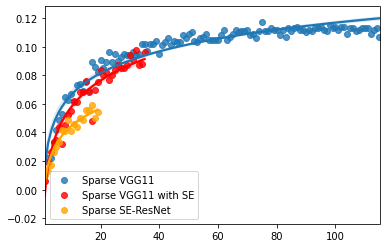

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#20211012-212859
acc1=[0.011,0.022,0.022,0.033,0.042,0.049,0.053,0.065,0.063,0.067,0.061,0.073,0.074,0.069,0.075,0.069,0.089,0.086,0.082,0.091,0.085,0.089,0.096,0.089,0.095,0.090,0.093,
0.095,0.094,0.094,0.096,0.094,0.095,0.102,0.102,0.097,0.102,0.102,0.104,0.095,0.101,0.103,0.106,0.101,0.104,0.103,0.103,0.108,0.106,0.109,0.110,0.104,0.103,0.106,0.107,
0.109,0.105,0.105,0.105,0.105,0.108,0.112,0.105,0.107,0.109,0.112,0.110,0.111,0.111,0.112,0.108,0.109,0.106,0.111,0.117,0.111,0.111,0.113,0.112,0.112,0.108,0.112,0.107,
0.113,0.111,0.113,0.114,0.112,0.112,0.110,0.112,0.111,0.113,0.113,0.114,0.112,0.111,0.115,0.113,0.114,0.112,0.114,0.114,0.109,0.113,0.113,0.111,0.112,0.113,0.113,0.113,
0.109,0.112,0.113,0.107]
acc4=[0.006,0.019,0.026,0.033,0.035,0.044,0.032,0.045,0.052,0.055,0.062,0.061,0.068,0.068,0.076,0.068,0.048,0.070,0.075,0.084,0.080,0.082,0.077,0.080,0.084,0.087,0.085,
0.085,0.087,0.094,0.091,0.098,0.087,0.088,0.096]
acc5=[0.010,0.013,0.017,0.026,0.030,0.033,0.042,0.041,0.049,0.041,0.046,0.044,0.050,0.049,0.056,0.056,0.059,0.050,0.054]
sns.regplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),logx=True,label="Sparse VGG11")
sns.regplot(x=np.array(range(len(acc4)))+1, y=np.array(acc4),logx=True,label="Sparse VGG11 with SE",color="red")
sns.regplot(x=np.array(range(len(acc5)))+1, y=np.array(acc5),logx=True,label="Sparse SE-ResNet",color="orange")
plt.legend()

In [ ]:
np.argmax(acc1)

74

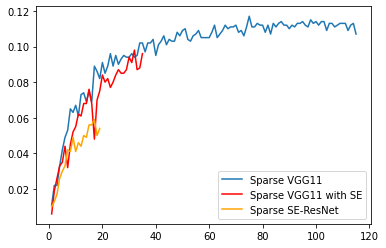

In [ ]:
sns.lineplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),label="Sparse VGG11")
sns.lineplot(x=np.array(range(len(acc4)))+1, y=np.array(acc4),label="Sparse VGG11 with SE",color="red")
sns.lineplot(x=np.array(range(len(acc5)))+1, y=np.array(acc5),label="Sparse SE-ResNet",color="orange")
plt.legend()

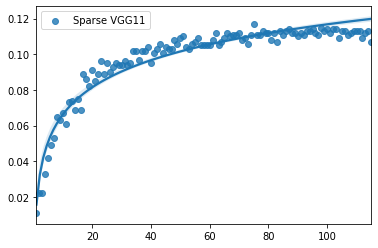

In [ ]:
sns.regplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),logx=True,label="Sparse VGG11")
#plt.plot(range(0,len(acc1)),acc1,label="Sparse VGG11")
plt.legend()

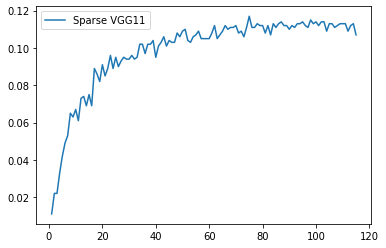

In [ ]:
sns.lineplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),label="Sparse VGG11")
#plt.plot(range(0,len(acc1)),acc1,label="Sparse VGG11")
plt.legend()

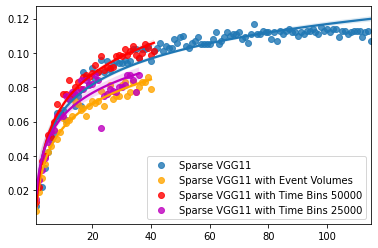

In [ ]:
acc2=[0.008,0.019,0.027,0.035,0.042,0.046,0.055,0.050,0.054,0.062,0.059,0.061,0.063,0.072,0.070,0.067,0.068,0.063,0.069,0.072,0.071,0.072,0.078,0.069,0.076,0.081,0.073,0.075,
      0.075,0.081,0.083,0.075,0.077,0.083,0.077,0.080,0.083,0.083,0.086,0.079]
#20211029-155825
acc3=[0.013,0.022,0.037,0.040,0.052,0.051,0.060,0.070,0.065,0.076,0.076,0.084,0.076,0.080,0.083,0.079,0.086,0.087,0.086,0.088,0.093,0.089,0.098,0.090,0.092,0.091,0.092,0.098,0.099,0.098,0.102,0.099,
      0.101,0.104,0.099,0.097,0.100,0.105,0.103,0.099,0.101]
#20211030-160236
acc6=[0.015,0.026,0.032,0.039,0.048,0.054,0.055,0.063,0.064,0.063,0.075,0.073,0.077,0.076,0.077,0.084,0.079,0.084,0.081,0.082,0.087,0.084,0.056,0.075,0.076,0.079,0.078,0.077,0.080,0.080,0.081,0.087,
      0.087,0.084,0.077,0.087]
#20211031-083722
acc7=[0.019,0.027,0.026,0.046,0.050,0.058,0.063,0.066,0.066,0.070,0.074,0.080]
sns.regplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),logx=True,label="Sparse VGG11")
sns.regplot(x=np.array(range(len(acc2)))+1, y=np.array(acc2),logx=True,label="Sparse VGG11 with Event Volumes",color="orange")
sns.regplot(x=np.array(range(len(acc3)))+1, y=np.array(acc3),logx=True,label="Sparse VGG11 with Time Bins 50000",color="red")
sns.regplot(x=np.array(range(len(acc6)))+1, y=np.array(acc6),logx=True,label="Sparse VGG11 with Time Bins 25000",color="m")
plt.legend()

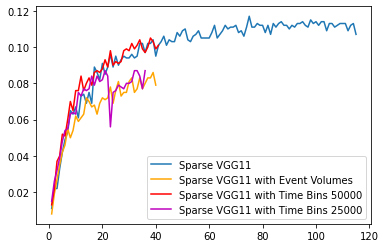

In [ ]:
sns.lineplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),label="Sparse VGG11")
sns.lineplot(x=np.array(range(len(acc2)))+1, y=np.array(acc2),label="Sparse VGG11 with Event Volumes",color="orange")
sns.lineplot(x=np.array(range(len(acc3)))+1, y=np.array(acc3),label="Sparse VGG11 with Time Bins 50000",color="red")
sns.lineplot(x=np.array(range(len(acc6)))+1, y=np.array(acc6),label="Sparse VGG11 with Time Bins 25000",color="m")
plt.legend()

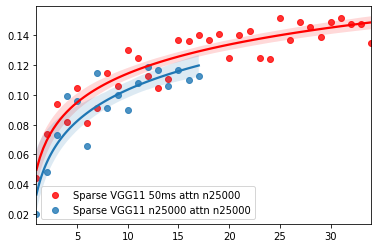

In [ ]:
#20211104-011949
#20211105-171604
acc8=[0.015,0.025,0.046,0.048,0.054,0.065,0.074,0.080,0.074,0.086,0.090,0.081,0.100,0.093,0.097,0.098,0.096,0.109,0.106,0.094,0.111,0.106,0.109,0.112,0.116,0.119,0.115,0.116,0.120,
    0.117,0.117,0.124,0.120,0.123,0.121,0.119,0.115,0.122,0.126,0.121,0.128,0.123,0.132,0.130,0.126,0.130,0.132,0.132,0.133,0.135,0.136,0.136]
#20211106-113554
acc9=[0.011,0.031,0.046,0.045,0.051,0.044,0.053,0.061,0.068,0.076,0.067,0.082,0.076,0.079,0.077,0.082,0.081,0.088,0.085,0.092,0.090,0.096,0.092,0.099,0.094,0.091,0.097,0.098,0.102,
    0.099,0.099,0.094,0.101,0.098,0.096,0.096,0.095,0.096,0.094,0.099,0.100,0.103,0.101,0.104,0.103,0.105,0.098,0.102,0.104,0.101,0.105,0.102,0.107,0.105,0.104,0.103,0.104,0.109,0.107,
    0.111,0.106,0.106,0.109,0.112,0.097,0.105,0.108,0.108,0.106,0.104,0.106,0.108,0.105,0.108,0.114,0.107,0.107,0.110,0.105,0.108,0.110,0.106,0.108,0.108,0.112,0.108,0.110,0.107]
#20211107-022641
#20211115-165051 12 174
acc10=[0.059,0.073,0.099,0.095,0.119,0.106,0.097,0.109,0.136,0.128,0.091,0.132,0.128,0.139,0.124,0.132,0.132,0.143,0.143,0.152,0.146,0.137,0.148,0.144,0.158,0.148,0.141,0.136,0.144,0.147,
      0.168,0.153,0.147,0.156,0.137,0.153,0.165,0.156]
#20211107-132000
acc11=[0.044,0.074,0.094,0.082,0.105,0.081,0.091,0.115,0.106,0.130,0.125,0.113,0.105,0.111,0.137,0.136,0.140,0.137,0.141,0.125,0.140,0.143,0.125,0.124,0.152,0.137,0.149,0.146,0.139,0.149,
      0.152,0.148,0.148,0.135]
acc12=[0.020,0.048,0.073,0.099,0.096,0.066,0.115,0.091,0.100,0.090,0.108,0.119,0.117,0.106,0.117,0.110,0.113,0.132,0.107]
acc13=[0.050,0.057,0.076,0.114,0.095,0.117,0.108,0.133,0.112,0.134]
#sns.regplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),logx=True,label="Sparse VGG11 n25000")
#sns.regplot(x=np.array(range(len(acc8)))+1, y=np.array(acc8),logx=True,label="Sparse VGG11 50ms >n5000",color="orange")
#sns.regplot(x=np.array(range(len(acc9)))+1, y=np.array(acc9),logx=True,label="Sparse VGG11 50ms",color="m")
#sns.regplot(x=np.array(range(len(acc10)))+1, y=np.array(acc10),logx=True,label="Sparse VGG11 50ms attn n50000")
sns.regplot(x=np.array(range(len(acc11)))+1, y=np.array(acc11),logx=True,label="Sparse VGG11 50ms attn n25000",color="red")
sns.regplot(x=np.array(range(len(acc12)))+1, y=np.array(acc12),logx=True,label="Sparse VGG11 n25000 attn n25000")
#sns.regplot(x=np.array(range(len(acc13)))+1, y=np.array(acc13),logx=True,label="Sparse VGG11 50ms attn n50000 with encoder",color="orange")
plt.legend()

In [ ]:
len(acc10)

38

In [ ]:
np.max(acc10)

NameError: name 'np' is not defined

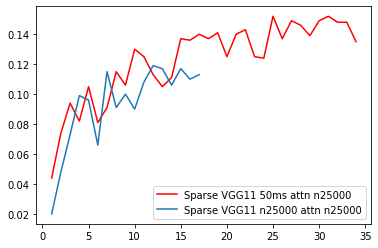

In [ ]:
#sns.lineplot(x=np.array(range(len(acc1)))+1, y=np.array(acc1),label="Sparse VGG11 n25000")
#sns.lineplot(x=np.array(range(len(acc8)))+1, y=np.array(acc8),label="Sparse VGG11 50ms >n5000",color="orange")
#sns.lineplot(x=np.array(range(len(acc9)))+1, y=np.array(acc9),label="Sparse VGG11 50ms",color="m")
#sns.lineplot(x=np.array(range(len(acc10)))+1, y=np.array(acc10),label="Sparse VGG11 50ms attn n50000")
sns.lineplot(x=np.array(range(len(acc11)))+1, y=np.array(acc11),label="Sparse VGG11 50ms attn n25000",color="red")
sns.lineplot(x=np.array(range(len(acc12)))+1, y=np.array(acc12),label="Sparse VGG11 n25000 attn n25000")
#sns.lineplot(x=np.array(range(len(acc13)))+1, y=np.array(acc13),label="Sparse VGG11 50ms attn n50000 with encoder",color="orange")
plt.legend()

<AxesSubplot:>

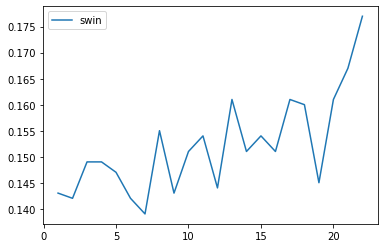

In [7]:
acc_swin = [0.143,0.142,0.149,0.149,0.147,0.142,0.139,0.155,0.143,0.151,0.154,0.144,0.161,0.151,0.154,0.151,0.161,0.160,0.145,0.161,0.167,0.177]
sns.lineplot(x=np.array(range(len(acc_swin)))+1, y=np.array(acc_swin ),label="swin")

In [26]:
import torch

img_mask = torch.zeros((1, 14, 14, 1))  # 1 H W 1
h_slices = (slice(0, -7),
            slice(-7, -3),
            slice(-3, None))
w_slices = (slice(0, -7),
            slice(-7, -3),
            slice(-3, None))
cnt = 0
for h in h_slices:
    for w in w_slices:
        img_mask[:, h, w, :] = cnt
        cnt += 1
print(img_mask.view(14,14))

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5.],
        [3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5.],
        [3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5.],
        [3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8.],
        [6., 6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8.],
        [6., 6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8.]])


In [27]:
def window_partition(x, window_size):
    """
    Args:
        x: (B, H, W, C)
        window_size (int): window size

    Returns:
        windows: (num_windows*B, window_size, window_size, C)
    """
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows

mask_windows = window_partition(img_mask,7)
for i in range(mask_windows.shape[0]):
    print(mask_windows[i].view(7,7))

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 1., 2., 2., 2.]])
tensor([[3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [6., 6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6., 6.]])
tensor([[4., 4., 4., 4., 5., 5., 5.],
        [4., 4., 4., 4., 5., 5., 5.],
        [4., 4., 4., 4., 5., 5., 5.],
        [4., 4., 4., 4., 5., 5., 5.],
        [7., 7., 7., 7., 8., 8., 8.],
        [

In [28]:
mask_windows = mask_windows.view(-1, 7 * 7)
attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
print(attn_mask.shape)
attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

torch.Size([4, 49, 49])


In [35]:
x1 = 3
y1 = 3
x2 = 3
y2 = 4
print(attn_mask[1][7*x1+y1][7*x2+y2])

tensor(-100.)


In [69]:
import torch.nn as nn

class sparseNorm(nn.Module):
    def __init__(self, dim, momentum=0.1):
        super(sparseNorm, self).__init__()
        self.weight = nn.Parameter(torch.ones([1,1,dim]))
        self.bias = nn.Parameter(torch.zeros([1,1,dim]))
    
    def forward(self, x):
        #B,N,C
        C = x.shape[-1]
        true_loc = (torch.sum(x,dim=-1)!=0) #B,N
        mean = x.mean(dim=-1) #B,N
        var = x.var(dim=-1,unbiased=False) #B,N
        res = (x - mean[:,:,None]) / (torch.sqrt(var[:,:,None] + 1e-8))
        res = self.weight * res + self.bias
        x = torch.where(true_loc[:,:,None].repeat(1,1,C),res,x)
        return x

x = torch.Tensor([[[1,2,3],[2,4,6],[1,2,3]],[[0,0,0],[1,5,7],[2,3,4]]])
nn.LayerNorm(3)(x)

tensor([[[-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247]],

        [[ 0.0000,  0.0000,  0.0000],
         [-1.3363,  0.2673,  1.0690],
         [-1.2247,  0.0000,  1.2247]]], grad_fn=<NativeLayerNormBackward>)

In [70]:
sparseNorm(3)(x)

tensor([[[-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247]],

        [[ 0.0000,  0.0000,  0.0000],
         [-1.3363,  0.2673,  1.0690],
         [-1.2247,  0.0000,  1.2247]]], grad_fn=<SWhereBackward>)

In [66]:
class LayerNorm2d(nn.Module):
    def __init__(self, dim, momentum=0.1):
        super(LayerNorm2d, self).__init__()
        self.gamma = nn.Parameter(torch.ones([1,1,dim]))
        self.beta = nn.Parameter(torch.zeros([1,1,dim]))
    
    def forward(self, x):
        mean = x.mean(dim=[2],keepdim=True)
        var = x.var(dim=[2],keepdim=True,unbiased=False)
        x = (x - mean) / (torch.sqrt(var + 1e-8))
        return x * self.gamma + self.beta

LayerNorm2d(3)(x)

tensor([[[-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247],
         [-1.2247,  0.0000,  1.2247]],

        [[ 0.0000,  0.0000,  0.0000],
         [-1.3363,  0.2673,  1.0690],
         [-1.2247,  0.0000,  1.2247]]], grad_fn=<AddBackward0>)